In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

import sklearn.metrics as metrics

In [29]:
df = pd.read_csv("football_players_dataset_traits_processed.csv", index_col=0)
df.head()

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   

   contract_valid_until  overall_rating  ...  CAM  CM  CDM LB  CB  RB  GK  \
0                  2021              93  ...    0   0    0  0   0   0   0   
1                  2022              92  ...    0   0    0  0   0   0   0   
2                  2023              91  ...    0   0    0  0   0   0   1   
3                  2023              91  ...    1   1    0  0   0   0   0   
4                  2022              91  ...    1   0    0  0   0   0   0   

  years_left_on_contract  att_work_rate  def_work_rate  
0                      0         Medium            Low  
1                      1           High            Low  
2                      2         Medium         Medium  
3                      2           High           High  
4                      1           High         Medium  

[5 rows x 66 columns]

In [30]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [31]:
df_dummies = pd.get_dummies(df[["prefered_foot", "att_work_rate", "def_work_rate"]])

In [32]:
df_dummies.head()

prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   

   def_work_rate_Low  def_work_rate_Medium  
0                  1                     0  
1                  1                     0  
2                  0                     1  
3                  0                     0  
4                  0                     1

In [33]:
df = df.join(df_dummies)

In [34]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [38]:
final_df = df.drop(columns=["full_name", "dateOfBirth", "positions", "club", "contract_valid_until", "prefered_foot", "work_rate", "att_work_rate", "def_work_rate"])
print(final_df.drop(columns=["short_name", "value"]).shape)
calculate_vif_(final_df.drop(columns=["short_name", "value"]), thresh=5.0)
print(final_df.drop(columns=["short_name", "value"]).shape)

(18615, 63)
dropping 'prefered_foot_Left' at index: 55
dropping 'att_work_rate_High' at index: 56
dropping 'def_work_rate_Medium' at index: 60
dropping 'overall_rating' at index: 3
dropping 'height' at index: 1
dropping 'potential' at index: 2
dropping 'skill_ball_control' at index: 16
dropping 'atk_short_passing' at index: 10
dropping 'mvmt_acceleration' at index: 15
dropping 'def_standing_tackle' at index: 31
dropping 'mvmt_reactions' at index: 17
dropping 'weight' at index: 1
dropping 'skill_dribbling' at index: 10
dropping 'mvmt_agility' at index: 14
dropping 'pow_shot_power' at index: 15
dropping 'ment_positioning' at index: 21
dropping 'ment_composure' at index: 23
dropping 'atk_finishing' at index: 7
dropping 'def_sliding_tackle' at index: 23
dropping 'ment_vision' at index: 20
dropping 'pow_stamina' at index: 15
dropping 'atk_heading_accuracy' at index: 7
dropping 'atk_crossing' at index: 6
dropping 'mvmt_sprint_speed' at index: 10
dropping 'skill_long_passing' at index: 9
drop

In [39]:
final_df = final_df[['wage', 'release_clause', 'ST', 'LW', 'RW', 'CAM', 'CM', 'CDM', 'LB',
       'CB', 'RB', 'GK', 'years_left_on_contract', 'prefered_foot_Right',
       'att_work_rate_Low', 'att_work_rate_Medium', 'def_work_rate_High',
       'def_work_rate_Low', 'value']]

In [40]:
final_df.columns.to_list()

['wage',
 'release_clause',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK',
 'years_left_on_contract',
 'prefered_foot_Right',
 'att_work_rate_Low',
 'att_work_rate_Medium',
 'def_work_rate_High',
 'def_work_rate_Low',
 'value']

# Première prédiction

In [41]:
X = final_df.drop(columns=["value"])
y = final_df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
pipeline = Pipeline([('scaler', StandardScaler()), ('EN', lm.ElasticNet())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('EN', ElasticNet())])

In [43]:
y_pred = pipeline.predict(X_test)

In [44]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

2544104.5281940917

In [45]:
metrics.r2_score(y_test, y_pred)

0.8912446320366985

In [46]:
X_test.shape, y_test.shape, y_pred.shape

((6143, 18), (6143,), (6143,))

In [47]:
coefs = pipeline.named_steps['EN'].coef_

columns = X_train.columns.to_list()

len(coefs), len(columns)

d = {'column': columns, 'coef': coefs}

coefficients = pd.DataFrame(data=d)
coefficients["abs_coef"] = abs(coefficients["coef"])
coefficients = coefficients.sort_values(by=['abs_coef'], ascending=False)
coefficients.head(60)

column          coef      abs_coef
1           release_clause  3.892200e+06  3.892200e+06
0                     wage  2.109224e+06  2.109224e+06
12  years_left_on_contract  2.019038e+05  2.019038e+05
15    att_work_rate_Medium -1.471570e+05  1.471570e+05
14       att_work_rate_Low -8.846096e+04  8.846096e+04
16      def_work_rate_High  8.734398e+04  8.734398e+04
5                      CAM  8.062057e+04  8.062057e+04
3                       LW  4.199581e+04  4.199581e+04
13     prefered_foot_Right -3.053953e+04  3.053953e+04
7                      CDM  2.873449e+04  2.873449e+04
6                       CM  2.788754e+04  2.788754e+04
4                       RW  2.604892e+04  2.604892e+04
8                       LB -2.436237e+04  2.436237e+04
2                       ST  2.187117e+04  2.187117e+04
10                      RB -2.141077e+04  2.141077e+04
17       def_work_rate_Low -1.288398e+04  1.288398e+04
9                       CB -4.119945e+03  4.119945e+03
11                      GK  3.704217e+03  3.704217e+03

In [48]:
df["predicted_value"] = pipeline.predict(df[['wage', 'release_clause', 'ST', 'LW', 'RW', 'CAM', 'CM', 'CDM', 'LB',
       'CB', 'RB', 'GK', 'years_left_on_contract', 'prefered_foot_Right',
       'att_work_rate_Low', 'att_work_rate_Medium', 'def_work_rate_High',
       'def_work_rate_Low']])

In [49]:
df.head(10)

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   
5     R. Lewandowski                   Robert Lewandowski   32  1988-08-21   
6          K. Mbappé                 Kylian Mbappé Lottin   22  1998-12-20   
7            Alisson                Alisson Ramsés Becker   28  1992-10-02   
8           M. Salah                  Mohamed Salah Ghaly   28  1992-06-15   
9            S. Mané                           Sadio Mané   28  1992-04-10   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   
5     183      80              ['ST']    FC Bayern München   
6     178      73  ['ST', 'LW', 'RW']  Paris Saint-Germain   
7     190      91              ['GK']            Liverpool   
8     175      71              ['RW']            Liverpool   
9     175      69              ['LW']            Liverpool   

   contract_valid_until  overall_rating  ...  def_work_rate  \
0                  2021              93  ...            Low   
1                  2022              92  ...            Low   
2                  2023              91  ...         Medium   
3                  2023              91  ...           High   
4                  2022              91  ...         Medium   
5                  2023              91  ...         Medium   
6                  2022              90  ...            Low   
7                  2024              90  ...         Medium   
8                  2023              90  ...         Medium   
9                  2023              90  ...         Medium   

   prefered_foot_Left  prefered_foot_Right att_work_rate_High  \
0                   1                    0                  0   
1                   0                    1                  1   
2                   0                    1                  0   
3                   0                    1                  1   
4                   0                    1                  1   
5                   0                    1                  1   
6                   0                    1                  1   
7                   0                    1                  0   
8                   1                    0                  1   
9                   0                    1                  1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   
5                  0                     0                   0   
6                  0                     0                   0   
7                  0                     1                   0   
8                  0                     0                   0   
9                  0                     0                   0   

  def_work_rate_Low  def_work_rate_Medium  predicted_value  
0                 1                     0     1.175099e+08  
1                 1                     0     5.217034e+07  
2                 0                     1     8.093064e+07  
3                 0                     0     1.037951e+08  
4                 0       

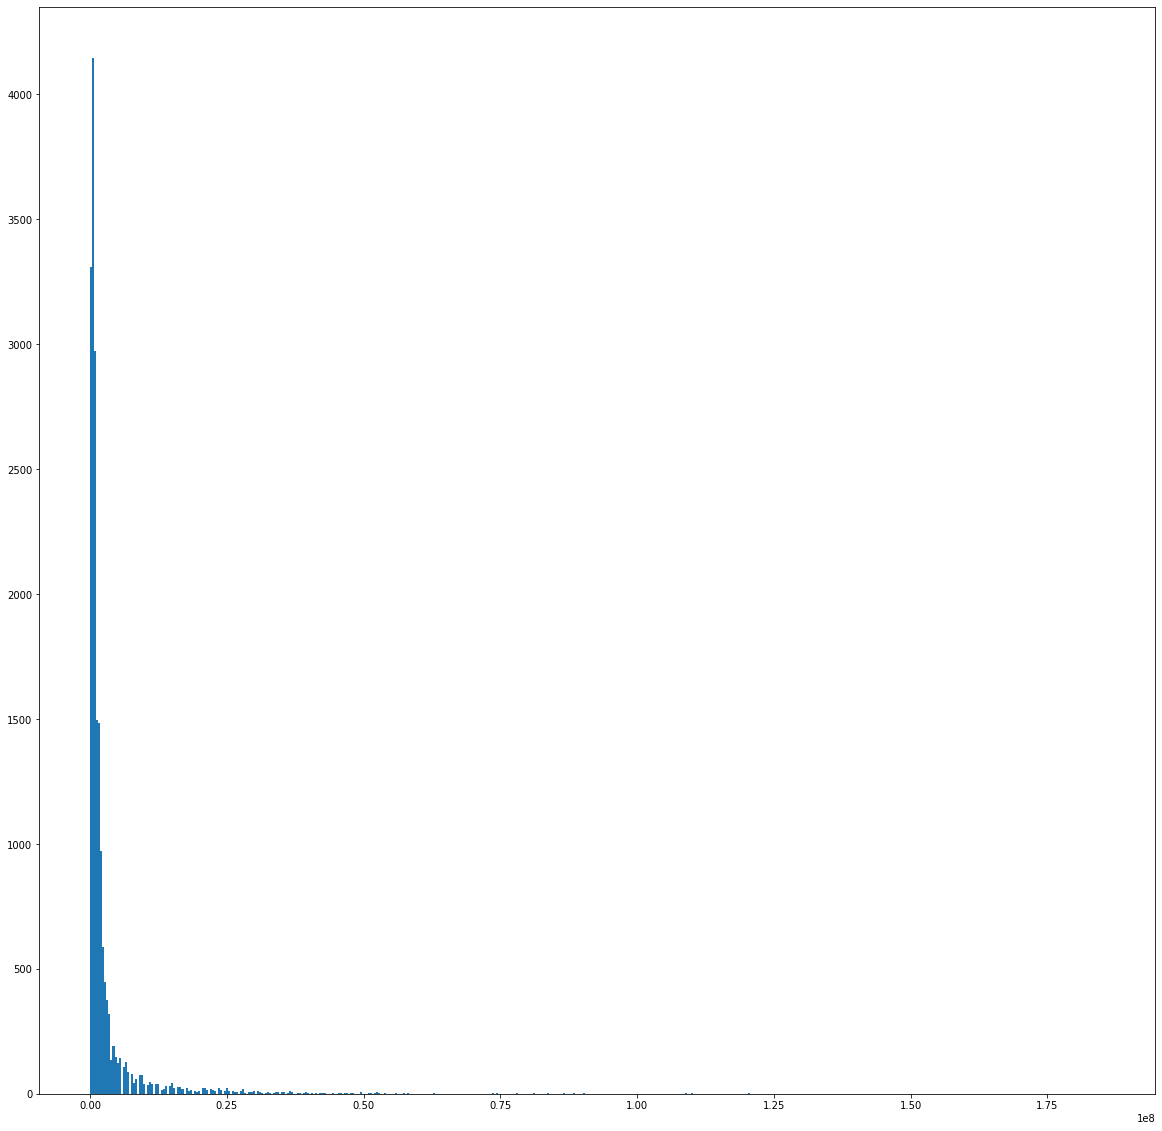

In [50]:
plt.figure(figsize=(20,20))
plt.hist(df["value"], bins=500)
plt.show()

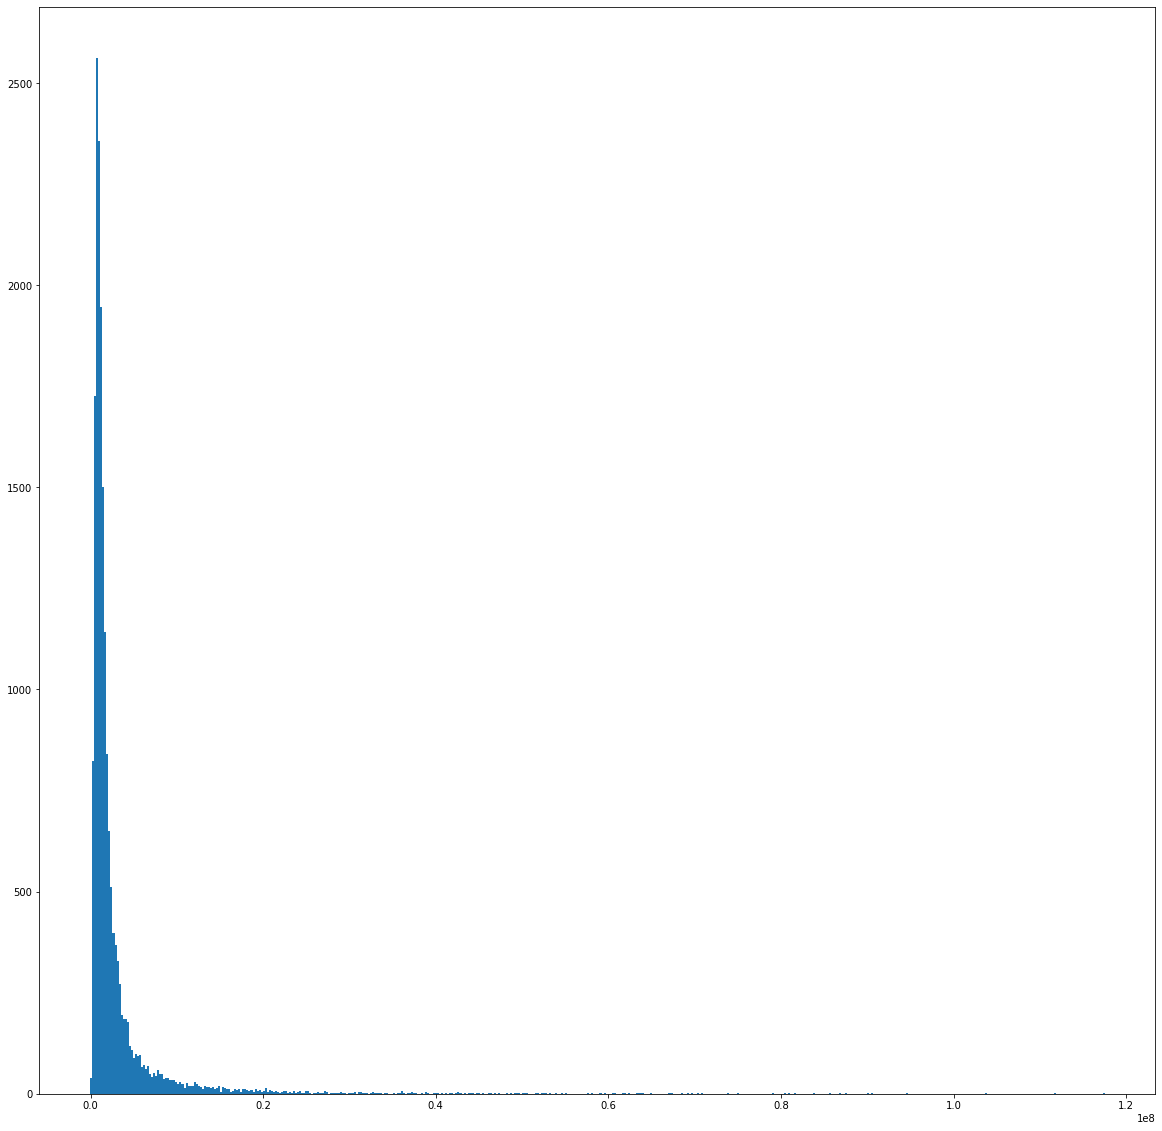

In [52]:
plt.figure(figsize=(20,20))
plt.hist(df["predicted_value"], bins=500)
plt.show()

In [54]:
pipeline.score(X_test, y_test)

0.8912446320366985